In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm

In [54]:
import pandas as pd
path1 = './data/train.csv'
path2 = './data/age_gender_info.csv'
path3 = './data/test.csv'
path4 = './data/sample_submission.csv'

In [55]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [57]:
train = pd.read_csv(path1)
test = pd.read_csv(path3)
age_gender = pd.read_csv(path2, index_col=0)
sample_submission = pd.read_csv(path4)

In [59]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

<AxesSubplot:ylabel='Density'>

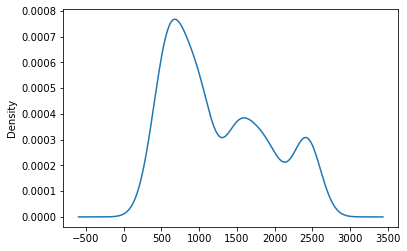

In [77]:
train[train['임대건물구분']=='상가']['총세대수'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

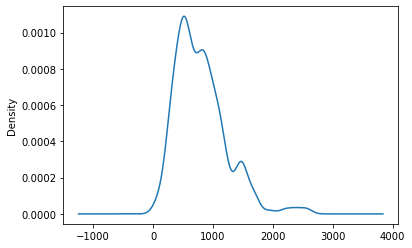

In [78]:
train[train['임대건물구분']!='상가']['총세대수'].plot(kind='density')

In [62]:
a = train[train['지역']=='강원도']
train[train['공급유형']=='행복주택']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2534,C1210,1088,아파트,대구광역시,행복주택,21.56,85,39.0,J,19880000,107680,0.0,4.0,773.0,586.0
2535,C1210,1088,아파트,대구광역시,행복주택,21.56,57,39.0,J,19880000,107680,0.0,4.0,773.0,586.0
2536,C1210,1088,아파트,대구광역시,행복주택,21.56,498,39.0,J,20680000,112010,0.0,4.0,773.0,586.0
2537,C1210,1088,아파트,대구광역시,행복주택,26.62,76,39.0,J,24800000,134330,0.0,4.0,773.0,586.0
2538,C1210,1088,아파트,대구광역시,행복주택,36.74,372,39.0,J,33920000,183730,0.0,4.0,773.0,586.0
2552,C1685,295,아파트,충청북도,행복주택,26.04,49,28.0,K,40572000,21120,0.0,1.0,167.0,164.0
2553,C1685,295,아파트,충청북도,행복주택,26.04,38,28.0,K,40572000,21120,0.0,1.0,167.0,164.0
2554,C1685,295,아파트,충청북도,행복주택,26.07,98,28.0,K,40572000,21120,0.0,1.0,167.0,164.0
2555,C1685,295,아파트,충청북도,행복주택,26.07,15,28.0,K,40572000,21120,0.0,1.0,167.0,164.0
2556,C1685,295,아파트,충청북도,행복주택,26.24,15,28.0,K,40572000,21120,0.0,1.0,167.0,164.0


In [5]:
female = []
male = []
for col in age_gender.columns:
    female.append(col) if '여자' in col else male.append(col)

print(female)
print(male)

['10대미만(여자)', '10대(여자)', '20대(여자)', '30대(여자)', '40대(여자)', '50대(여자)', '60대(여자)', '70대(여자)', '80대(여자)', '90대(여자)', '100대(여자)']
['10대미만(남자)', '10대(남자)', '20대(남자)', '30대(남자)', '40대(남자)', '50대(남자)', '60대(남자)', '70대(남자)', '80대(남자)', '90대(남자)', '100대(남자)']


In [6]:
female_ratio = pd.DataFrame(age_gender[female].iloc[:, 2:8].sum(axis=1), columns=['여자운전비율'])
male_ratio = pd.DataFrame(age_gender[male].iloc[:, 2:8].sum(axis=1), columns=['남자운전비율'])

In [7]:
male_ratio.head()

,남자운전비율
지역,
경상북도,0.356251
경상남도,0.371175
대전광역시,0.375242
경기도,0.362956
전라북도,0.361735


In [8]:
female_ratio.head()

,여자운전비율
지역,
경상북도,0.414740
경상남도,0.420857
대전광역시,0.429383
경기도,0.408027
전라북도,0.404363


In [9]:
train = pd.merge(train, female_ratio, on='지역')
train = pd.merge(train, male_ratio, on='지역')

In [10]:
test = pd.merge(test, female_ratio, on='지역')
test = pd.merge(test, male_ratio, on='지역')

In [11]:
def exception(train, test):
    _t1 = train.groupby('단지코드').sum()['전용면적별세대수']
    _t2 = pd.merge(train, _t1, on='단지코드')
    _t2['전용면적별세대수'] = _t2['전용면적별세대수_x']
    _t2['총세대수'] = _t2['전용면적별세대수_y']
    _final1 = _t2.drop(['전용면적별세대수_x','전용면적별세대수_y'], axis='columns')
    
    #train = _final1.set_index('단지코드').drop(index=['C2085', 'C1397', 'C2431', 'C1649', 'C1036', 'C1095', 
    #                                         'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']).reset_index()
    #test = test.set_index('단지코드').drop(index=['C2675', 'C2335', 'C1327']).reset_index()
    
    return train, test

In [12]:
train, test = exception(train, test)

In [13]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
여자운전비율                            0
남자운전비율                            0
dtype: int64

In [14]:
train_D = train[train['자격유형']=='D']
train_ND = train.drop(index = train_D.index)

In [15]:
test_D = test[test['자격유형']=='D']
test_ND = test.drop(index = test_D.index)

In [16]:
a = train_ND[train_ND['지역']=='강원도']
b = train_ND[train_ND['지역']=='경기도']

In [17]:
def nanprocess_v1(use_train):
    cities = list(set(use_train['지역']))
    aparts = list(set(use_train['단지코드']))
    _pre1 = use_train.copy()
    
    _col = '도보 10분거리 내 지하철역 수(환승노선 수 반영)'
    for city in tqdm(cities):
        _aparts_in_city = use_train[use_train['지역']==city]
        _codes_in_city = list(set(_aparts_in_city['단지코드']))
        _mean = np.nanmean(_aparts_in_city[_col])
        for code in _codes_in_city:
            _idx = _pre1[_pre1['단지코드']==code].index
            if all(_pre1.loc[_idx][_col].isna()):
                if _mean > 0.5:
                    _pre1.loc[_idx, _col] = 1
                else:
                    _pre1.loc[_idx, _col] = 0
            else:
                if np.nanmean(_pre1.loc[_idx, _col]) > 0.5:
                    _pre1.loc[_idx, _col] = 1
                else:
                    _pre1.loc[_idx, _col] = 0
    
    _col = '도보 10분거리 내 버스정류장 수'
    for city in tqdm(cities):
        _aparts_in_city = use_train[use_train['지역']==city]
        _codes_in_city = list(set(_aparts_in_city['단지코드']))
        _mean = np.nanmean(_aparts_in_city[_col])
        for code in _codes_in_city:
            _idx = _pre1[_pre1['단지코드']==code].index
            if all(_pre1.loc[_idx][_col].isna()):
                if _mean > 0.5:
                    _pre1.loc[_idx, _col] = 1
                else:
                    _pre1.loc[_idx, _col] = 0
            else:
                if np.nanmean(_pre1.loc[_idx, _col]) > 0.5:
                    _pre1.loc[_idx, _col] = 1
                else:
                    _pre1.loc[_idx, _col] = 0
    
    
    _pre2 = _pre1.copy()
    _col = ['임대보증금', '임대료']
    
    # '-' 처리된 데이터 일단 drop
    for col in _col:
        _pre2 = _pre2.drop(_pre2[_pre2[col] == '-'].index)
        _pre2[col] = _pre2[col].astype(float)
    _pre2['임대가치'] = _pre2['임대보증금'] + _pre2['임대료']
        
    return _pre1, _pre2

In [18]:
_, prep_train = nanprocess_v1(train)
_forC2152, prep_test = nanprocess_v1(test)

_forC2152['임대가치'] = np.mean(prep_test[prep_test['지역']=='강원도']['임대가치'])
prep_test = pd.concat([prep_test, _forC2152[_forC2152['단지코드'] == 'C2152']])

100%|██████████| 15/15 [00:01<00:00, 14.49it/s]


In [19]:
prep_train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
여자운전비율                            0
남자운전비율                            0
임대가치                            569
dtype: int64

In [20]:
prep_test.loc[390, '자격유형'] = 'A'
prep_test.loc[585, '자격유형'] = 'C'

In [21]:
prep = pd.concat([prep_train, prep_test])

In [22]:
prep.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,여자운전비율,남자운전비율,임대가치
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,1.0,1425.0,1015.0,0.41474,0.356251,15770680.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,1.0,1425.0,1015.0,0.41474,0.356251,15770680.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,1.0,1425.0,1015.0,0.41474,0.356251,27488330.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,1.0,1425.0,1015.0,0.41474,0.356251,27488330.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,1.0,1425.0,1015.0,0.41474,0.356251,27488330.0


In [23]:
local_rank = {'서울특별시': 16,
              '부산광역시': 15,
              '경기도': 14, 
              '대구광역시': 13,
              '광주광역시': 12,
              '대전광역시': 11,
              '울산광역시': 10,
              '세종특별자치시': 9,
              '제주특별자치도': 8,
              '충청남도': 7,
              '경상남도': 6,
              '충청남도': 5,
              '강원도': 4,
              '전라북도': 3,
              '경상북도': 2,
              '전라남도': 1
             }

In [24]:
# 지역
local_map = {}
for i, loc in enumerate(prep['지역'].unique()):
    _arr = [0] * len(prep['지역'].unique())
    _arr[i] = 1
    local_map[loc] = _arr
    
# 공급유형
supply_map = {}
for i, loc in enumerate(prep['공급유형'].unique()):
    _arr = [0] * len(prep['공급유형'].unique())
    _arr[i] = 1
    supply_map[loc] = _arr
    
# 자격유형
qual_map = {}
for i, loc in enumerate(prep['자격유형'].unique()):
    _arr = [0] * len(prep['자격유형'].unique())
    _arr[i] = 1
    qual_map[loc] = _arr

In [25]:
def preprocess_v1(prep, type='train'):
    aparts = list(set(prep['단지코드']))
    merge_set = []
    for code in tqdm(aparts):
        final_vector = {}

        usedat = prep[prep['단지코드'] == code]
        onlyapart = usedat[usedat['임대건물구분'] == '아파트']
        
        if '상가' in set(usedat['임대건물구분']):
            sanga = 1
            sangadat = usedat[usedat['임대건물구분'] == '상가']
            apartdat = usedat[usedat['임대건물구분'] == '아파트']
            sanga_area = sum(sangadat['전용면적'] * sangadat['전용면적별세대수'])
            apart_area = sum(apartdat['전용면적'] * apartdat['전용면적별세대수'])
        else:
            sanga = 0
            sanga_area = 0.0
            apart_area = sum(usedat['전용면적'] * usedat['전용면적별세대수'])
        
        final_vector['단지코드'] = [usedat['단지코드'].iloc[0]]
        final_vector['총세대수'] = [usedat['총세대수'].iloc[0]]
        final_vector['상가'] = [sanga]
        final_vector['아파트면적'] = [apart_area]
        final_vector['상가면적'] = [sanga_area]
        
        _onehot = sum([np.array(local_map[key]) for key in usedat['지역'].unique()])    # 지역정보
        for tp in zip(list(local_map.keys()), list(_onehot)):
            final_vector[tp[0]] = tp[1]
            
        _onehot = sum([np.array(supply_map[key]) * usedat.iloc[idx]['전용면적별세대수'] for idx, key in enumerate(usedat['공급유형'])])    # 공급유형
        for tp in zip(supply_map.keys(), _onehot):
            final_vector[tp[0]] = tp[1]
            
        _onehot = sum([np.array(qual_map[key]) * usedat.iloc[idx]['전용면적별세대수'] for idx, key in enumerate(usedat['자격유형'])])    # 자격유형
        for tp in zip(qual_map.keys(), _onehot):
            final_vector[tp[0]] = tp[1]     

        final_vector['공가수'] = [usedat['공가수'].iloc[0]]            
        final_vector['임대가치'] = [usedat['임대가치'].iloc[0]]
        final_vector['지하철'] = [usedat['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].iloc[0]]
        final_vector['버스'] = [usedat['도보 10분거리 내 버스정류장 수'].iloc[0]]
        final_vector['주차면수'] = [usedat['단지내주차면수'].iloc[0]]
        if type == 'train':
            final_vector['등록차량수'] = [usedat['등록차량수'].iloc[0]]
        
        del final_vector['공공분양']
        del final_vector[np.nan]
        #del final_vector['상가']
        #del final_vector['상가면적']
        
        
        merge_set.append(pd.DataFrame(final_vector))
    
    return pd.concat(merge_set)

finaltrain = preprocess_v1(prep_train).dropna()
finaltest = preprocess_v1(prep_test, 'test')

100%|██████████| 150/150 [00:02<00:00, 65.33it/s]


In [64]:
finaltrain

,총세대수,상가,아파트면적,상가면적,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시,국민임대,공공임대(10년),행복주택,영구임대,임대상가,공공임대(50년),공공임대(분납),공공임대(5년),A,E,H,J,C,D,I,L,K,B,G,N,M,O,F,공가수,임대가치,지하철,버스,주차면수,등록차량수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C2186,0.512567,-0.292013,-0.917799,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,-0.746370,-0.270095,-0.209824,0.474488,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,0.550911,-0.169219,0.584743,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,0.708542,-0.371768,0.048853,0.219882,744.0
C1227,0.217922,-0.292013,0.117253,-0.233815,-0.235109,2.576114,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,0.716124,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.781496,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.626446,-0.470757,-0.371768,0.048853,0.340053,823.0
C1026,-1.070525,-0.292013,-0.857875,-0.233815,4.253341,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,-0.504987,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.559675,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.334968,0.435417,-0.371768,0.048853,-1.062879,422.0
C2211,-1.035567,-0.292013,-1.109807,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,3.974921,-0.211604,-0.130189,-0.098058,-0.471857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.523287,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.917924,-0.747719,-0.371768,0.048853,-0.993012,244.0
C1685,-1.058040,-0.292013,-1.294616,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,3.605551,-0.251577,-0.211604,-0.130189,-0.098058,-1.191271,-0.270095,1.215070,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,1.501744,2.700404,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,1.413899,1.913019,-0.371768,0.048853,-1.169077,164.0
C1014,0.692350,-0.292013,0.615178,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,4.358899,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,1.165758,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.275338,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.820765,-0.552534,-0.371768,0.048853,0.664237,708.0
C2051,1.111844,-0.292013,3.275361,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,10.198039,-1.191271,5.092530,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.711999,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,1.816322,-0.371768,0.048853,0.474198,780.0
C1122,0.222916,-0.292013,0.324271,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,0.720857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.786694,-0.165679,-0.226290,-0.1692

In [27]:
finaltest.head()

,단지코드,총세대수,상가,아파트면적,상가면적,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시,국민임대,공공임대(10년),행복주택,영구임대,임대상가,공공임대(50년),공공임대(분납),공공임대(5년),A,E,H,J,C,D,I,L,K,B,G,N,M,O,F,공가수,임대가치,지하철,버스,주차면수
0,C2600,540,0,22734.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,540,0,0,0,0,0,0,0,540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,9707110.0,0.0,1.0,458.0
0,C2222,456,0,18952.09,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,456,0,0,0,0,0,0,0,456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,17240660.0,0.0,1.0,372.0
0,C1721,663,0,30540.07,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,663,0,0,0,0,0,0,0,663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.0,26615230.0,0.0,1.0,573.0
0,C1016,643,0,31862.02,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,20415630.0,1.0,1.0,646.0
0,C1604,534,0,27661.26,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,534,0,0,0,0,0,0,0,534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,16224870.0,0.0,1.0,400.0


In [28]:
means = {}
stds = {}
for col in finaltrain.columns.difference(['단지코드', '등록차량수']):
    means[col] = np.mean(finaltrain[col])
    stds[col] = np.std(finaltrain[col])
    finaltrain[col] = (finaltrain[col] - means[col]) / stds[col]
    
for col in finaltest.columns.difference(['단지코드']):
    finaltest[col] = (finaltest[col] - means[col]) / stds[col]

In [29]:
finaltrain.set_index('단지코드', inplace=True)

In [30]:
finaltest.set_index('단지코드', inplace=True)

In [31]:
import tensorflow as tf

In [32]:
import keras

Using TensorFlow backend.


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [34]:
finaltrain

,총세대수,상가,아파트면적,상가면적,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시,국민임대,공공임대(10년),행복주택,영구임대,임대상가,공공임대(50년),공공임대(분납),공공임대(5년),A,E,H,J,C,D,I,L,K,B,G,N,M,O,F,공가수,임대가치,지하철,버스,주차면수,등록차량수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C2186,0.512567,-0.292013,-0.917799,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,-0.746370,-0.270095,-0.209824,0.474488,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,0.550911,-0.169219,0.584743,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,0.708542,-0.371768,0.048853,0.219882,744.0
C1227,0.217922,-0.292013,0.117253,-0.233815,-0.235109,2.576114,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,0.716124,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.781496,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.626446,-0.470757,-0.371768,0.048853,0.340053,823.0
C1026,-1.070525,-0.292013,-0.857875,-0.233815,4.253341,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,-0.504987,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.559675,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.334968,0.435417,-0.371768,0.048853,-1.062879,422.0
C2211,-1.035567,-0.292013,-1.109807,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,3.974921,-0.211604,-0.130189,-0.098058,-0.471857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.523287,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.917924,-0.747719,-0.371768,0.048853,-0.993012,244.0
C1685,-1.058040,-0.292013,-1.294616,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,3.605551,-0.251577,-0.211604,-0.130189,-0.098058,-1.191271,-0.270095,1.215070,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,1.501744,2.700404,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,1.413899,1.913019,-0.371768,0.048853,-1.169077,164.0
C1014,0.692350,-0.292013,0.615178,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,4.358899,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,1.165758,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.275338,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.820765,-0.552534,-0.371768,0.048853,0.664237,708.0
C2051,1.111844,-0.292013,3.275361,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,10.198039,-1.191271,5.092530,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.711999,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,1.816322,-0.371768,0.048853,0.474198,780.0
C1122,0.222916,-0.292013,0.324271,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,0.720857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.786694,-0.165679,-0.226290,-0.1692

In [35]:
finaltrain

,총세대수,상가,아파트면적,상가면적,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시,국민임대,공공임대(10년),행복주택,영구임대,임대상가,공공임대(50년),공공임대(분납),공공임대(5년),A,E,H,J,C,D,I,L,K,B,G,N,M,O,F,공가수,임대가치,지하철,버스,주차면수,등록차량수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C2186,0.512567,-0.292013,-0.917799,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,-0.746370,-0.270095,-0.209824,0.474488,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,0.550911,-0.169219,0.584743,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,0.708542,-0.371768,0.048853,0.219882,744.0
C1227,0.217922,-0.292013,0.117253,-0.233815,-0.235109,2.576114,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,0.716124,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.781496,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.626446,-0.470757,-0.371768,0.048853,0.340053,823.0
C1026,-1.070525,-0.292013,-0.857875,-0.233815,4.253341,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,-0.504987,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.559675,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.334968,0.435417,-0.371768,0.048853,-1.062879,422.0
C2211,-1.035567,-0.292013,-1.109807,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,3.974921,-0.211604,-0.130189,-0.098058,-0.471857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-0.523287,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.917924,-0.747719,-0.371768,0.048853,-0.993012,244.0
C1685,-1.058040,-0.292013,-1.294616,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,3.605551,-0.251577,-0.211604,-0.130189,-0.098058,-1.191271,-0.270095,1.215070,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,-1.313435,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,1.501744,2.700404,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,1.413899,1.913019,-0.371768,0.048853,-1.169077,164.0
C1014,0.692350,-0.292013,0.615178,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,4.358899,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,-0.098058,1.165758,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.275338,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-0.820765,-0.552534,-0.371768,0.048853,0.664237,708.0
C2051,1.111844,-0.292013,3.275361,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,-0.211604,-0.130189,10.198039,-1.191271,5.092530,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,1.711999,-0.165679,-0.226290,-0.169219,-0.250494,-0.246085,-0.188942,-0.077357,-0.080787,-0.082901,-0.053948,-0.068628,-0.048853,-0.048853,-0.048853,-1.306561,1.816322,-0.371768,0.048853,0.474198,780.0
C1122,0.222916,-0.292013,0.324271,-0.233815,-0.235109,-0.388182,-0.246183,-0.514840,-0.229416,-0.310815,-0.246183,-0.217673,-0.246183,-0.185695,-0.139347,-0.277350,-0.251577,4.725816,-0.130189,-0.098058,0.720857,-0.270095,-0.209824,-0.282294,-0.246085,-0.155238,-0.063640,-0.048853,0.786694,-0.165679,-0.226290,-0.1692

In [36]:
train_x = finaltrain.drop(columns=['등록차량수'])
train_y = finaltrain['등록차량수']

In [37]:
input_size = len(finaltrain.columns.difference(['등록차량수']))

def build_model():
    model = Sequential()

    model.add(Dense(units=100, input_dim = input_size, init='glorot_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=200, init='glorot_normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=100, init='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=50, init='glorot_normal', activation='relu'))
    model.add(Dense(units=1))
    
    model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
    return model

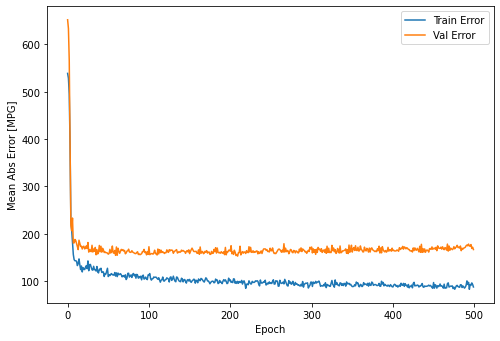

In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], list(hist['mean_absolute_error']),
           label='Train Error')
    plt.plot(hist['epoch'], list(hist['val_mean_absolute_error']),
           label = 'Val Error')
    plt.legend()


plot_history(history)

C:\Users\jason\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100, input_dim=48, activation="relu", kernel_initializer="glorot_normal")`
  
C:\Users\jason\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=200, activation="relu", kernel_initializer="glorot_normal")`
  
C:\Users\jason\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100, activation="relu", kernel_initializer="glorot_normal")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jason\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", kernel_initializer="glorot_normal")`
  if sys.path[0] == '':


Train on 336 samples, validate on 84 samples
Epoch 1/500
336/336 [==============================] - 1s 3ms/step - loss: 404969.6882 - mean_absolute_error: 538.3079 - val_loss: 666050.9464 - val_mean_absolute_error: 650.8354
Epoch 2/500
336/336 [==============================] - 0s 181us/step - loss: 391892.8080 - mean_absolute_error: 526.8068 - val_loss: 631787.2143 - val_mean_absolute_error: 628.5806
Epoch 3/500
336/336 [==============================] - 0s 178us/step - loss: 347171.7396 - mean_absolute_error: 487.0165 - val_loss: 514944.4583 - val_mean_absolute_error: 550.3553
Epoch 4/500
336/336 [==============================] - 0s 178us/step - loss: 235192.2139 - mean_absolute_error: 379.1726 - val_loss: 244073.6949 - val_mean_absolute_error: 355.7346
Epoch 5/500
336/336 [==============================] - 0s 193us/step - loss: 89192.0818 - mean_absolute_error: 228.5159 - val_loss: 70494.7958 - val_mean_absolute_error: 205.5221
Epoch 6/500
336/336 [==============================] -

336/336 [==============================] - 0s 166us/step - loss: 26463.1052 - mean_absolute_error: 120.3805 - val_loss: 69907.1257 - val_mean_absolute_error: 180.8546
Epoch 47/500
336/336 [==============================] - 0s 187us/step - loss: 26004.6686 - mean_absolute_error: 122.0048 - val_loss: 55463.4029 - val_mean_absolute_error: 159.5657
Epoch 48/500
336/336 [==============================] - 0s 177us/step - loss: 28345.5846 - mean_absolute_error: 123.2210 - val_loss: 55577.2935 - val_mean_absolute_error: 160.3914
Epoch 49/500
336/336 [==============================] - 0s 175us/step - loss: 24857.7175 - mean_absolute_error: 115.3167 - val_loss: 60323.5499 - val_mean_absolute_error: 169.7882
Epoch 50/500
336/336 [==============================] - 0s 174us/step - loss: 23598.8246 - mean_absolute_error: 111.2393 - val_loss: 52616.0275 - val_mean_absolute_error: 157.6174
Epoch 51/500
336/336 [==============================] - 0s 199us/step - loss: 22783.5647 - mean_absolute_error: 1

336/336 [==============================] - 0s 140us/step - loss: 24652.1721 - mean_absolute_error: 112.6250 - val_loss: 54224.0394 - val_mean_absolute_error: 158.6933
Epoch 92/500
336/336 [==============================] - 0s 140us/step - loss: 24100.8083 - mean_absolute_error: 111.2985 - val_loss: 54192.9747 - val_mean_absolute_error: 158.0898
Epoch 93/500
336/336 [==============================] - 0s 150us/step - loss: 22264.5315 - mean_absolute_error: 113.5442 - val_loss: 52942.2969 - val_mean_absolute_error: 156.2681
Epoch 94/500
336/336 [==============================] - 0s 142us/step - loss: 22492.7466 - mean_absolute_error: 110.1913 - val_loss: 55470.0435 - val_mean_absolute_error: 159.8572
Epoch 95/500
336/336 [==============================] - 0s 152us/step - loss: 20841.9754 - mean_absolute_error: 105.4739 - val_loss: 54074.7485 - val_mean_absolute_error: 157.8589
Epoch 96/500
336/336 [==============================] - 0s 135us/step - loss: 21663.9981 - mean_absolute_error: 1

336/336 [==============================] - 0s 165us/step - loss: 21029.1709 - mean_absolute_error: 108.5124 - val_loss: 58086.4196 - val_mean_absolute_error: 163.0530
Epoch 137/500
336/336 [==============================] - 0s 171us/step - loss: 24640.5113 - mean_absolute_error: 112.8817 - val_loss: 54275.5283 - val_mean_absolute_error: 157.0671
Epoch 138/500
336/336 [==============================] - 0s 169us/step - loss: 20235.6763 - mean_absolute_error: 100.5754 - val_loss: 52860.4278 - val_mean_absolute_error: 154.1570
Epoch 139/500
336/336 [==============================] - 0s 167us/step - loss: 18808.1301 - mean_absolute_error: 103.5056 - val_loss: 51913.1700 - val_mean_absolute_error: 152.4228
Epoch 140/500
336/336 [==============================] - 0s 173us/step - loss: 18270.9955 - mean_absolute_error: 101.8895 - val_loss: 53873.7716 - val_mean_absolute_error: 154.5455
Epoch 141/500
336/336 [==============================] - 0s 173us/step - loss: 19062.5969 - mean_absolute_err

336/336 [==============================] - 0s 210us/step - loss: 16880.5015 - mean_absolute_error: 94.2344 - val_loss: 58572.0621 - val_mean_absolute_error: 159.6928
Epoch 182/500
336/336 [==============================] - 0s 209us/step - loss: 19158.0890 - mean_absolute_error: 102.5207 - val_loss: 60770.5841 - val_mean_absolute_error: 163.8575
Epoch 183/500
336/336 [==============================] - 0s 212us/step - loss: 18355.2557 - mean_absolute_error: 99.7749 - val_loss: 58961.2407 - val_mean_absolute_error: 160.5158
Epoch 184/500
336/336 [==============================] - 0s 217us/step - loss: 18848.1988 - mean_absolute_error: 103.5333 - val_loss: 59735.4234 - val_mean_absolute_error: 161.6594
Epoch 185/500
336/336 [==============================] - 0s 214us/step - loss: 18326.3053 - mean_absolute_error: 98.2195 - val_loss: 56880.6674 - val_mean_absolute_error: 157.6350
Epoch 186/500
336/336 [==============================] - 0s 211us/step - loss: 18747.5571 - mean_absolute_error:

336/336 [==============================] - 0s 135us/step - loss: 18560.4845 - mean_absolute_error: 96.7538 - val_loss: 60515.8910 - val_mean_absolute_error: 165.3417
Epoch 227/500
336/336 [==============================] - 0s 142us/step - loss: 19173.3462 - mean_absolute_error: 99.7572 - val_loss: 60455.5052 - val_mean_absolute_error: 166.0969
Epoch 228/500
336/336 [==============================] - 0s 161us/step - loss: 19550.1347 - mean_absolute_error: 103.3085 - val_loss: 55653.4375 - val_mean_absolute_error: 156.8335
Epoch 229/500
336/336 [==============================] - 0s 166us/step - loss: 17926.7091 - mean_absolute_error: 99.5786 - val_loss: 59611.1518 - val_mean_absolute_error: 162.0095
Epoch 230/500
336/336 [==============================] - 0s 166us/step - loss: 17673.8868 - mean_absolute_error: 99.2693 - val_loss: 55091.5246 - val_mean_absolute_error: 153.8987
Epoch 231/500
336/336 [==============================] - 0s 160us/step - loss: 18349.4572 - mean_absolute_error: 

336/336 [==============================] - 0s 253us/step - loss: 17588.3804 - mean_absolute_error: 94.4010 - val_loss: 63505.7507 - val_mean_absolute_error: 165.5909
Epoch 272/500
336/336 [==============================] - 0s 216us/step - loss: 14809.0658 - mean_absolute_error: 90.7478 - val_loss: 60811.1853 - val_mean_absolute_error: 159.8317
Epoch 273/500
336/336 [==============================] - 0s 142us/step - loss: 18429.6353 - mean_absolute_error: 101.8393 - val_loss: 59594.7641 - val_mean_absolute_error: 157.8929
Epoch 274/500
336/336 [==============================] - 0s 127us/step - loss: 20121.7793 - mean_absolute_error: 101.6570 - val_loss: 60469.8147 - val_mean_absolute_error: 160.4886
Epoch 275/500
336/336 [==============================] - 0s 172us/step - loss: 15671.0694 - mean_absolute_error: 90.6937 - val_loss: 60922.5755 - val_mean_absolute_error: 161.8433
Epoch 276/500
336/336 [==============================] - 0s 164us/step - loss: 17654.6051 - mean_absolute_error:

336/336 [==============================] - 0s 209us/step - loss: 14671.4546 - mean_absolute_error: 89.9948 - val_loss: 57988.2132 - val_mean_absolute_error: 157.5056
Epoch 317/500
336/336 [==============================] - 0s 216us/step - loss: 17275.6610 - mean_absolute_error: 93.8315 - val_loss: 54388.2225 - val_mean_absolute_error: 153.5391
Epoch 318/500
336/336 [==============================] - 0s 205us/step - loss: 18926.7142 - mean_absolute_error: 97.2324 - val_loss: 60091.8445 - val_mean_absolute_error: 162.8025
Epoch 319/500
336/336 [==============================] - 0s 212us/step - loss: 16542.4506 - mean_absolute_error: 93.5328 - val_loss: 56457.0900 - val_mean_absolute_error: 156.7777
Epoch 320/500
336/336 [==============================] - 0s 210us/step - loss: 18040.4919 - mean_absolute_error: 96.5494 - val_loss: 58066.6436 - val_mean_absolute_error: 158.4439
Epoch 321/500
336/336 [==============================] - 0s 220us/step - loss: 18003.8850 - mean_absolute_error: 9

336/336 [==============================] - 0s 144us/step - loss: 14597.9493 - mean_absolute_error: 90.0186 - val_loss: 55482.7760 - val_mean_absolute_error: 153.2603
Epoch 362/500
336/336 [==============================] - 0s 157us/step - loss: 16730.0813 - mean_absolute_error: 94.6279 - val_loss: 63456.4330 - val_mean_absolute_error: 162.1415
Epoch 363/500
336/336 [==============================] - 0s 151us/step - loss: 14000.3318 - mean_absolute_error: 86.7315 - val_loss: 58540.6786 - val_mean_absolute_error: 154.1908
Epoch 364/500
336/336 [==============================] - 0s 300us/step - loss: 17205.3656 - mean_absolute_error: 93.7992 - val_loss: 59722.9583 - val_mean_absolute_error: 156.7592
Epoch 365/500
336/336 [==============================] - 0s 305us/step - loss: 14500.0128 - mean_absolute_error: 87.3358 - val_loss: 62777.0030 - val_mean_absolute_error: 161.7217
Epoch 366/500
336/336 [==============================] - 0s 316us/step - loss: 16388.7841 - mean_absolute_error: 9

336/336 [==============================] - 0s 213us/step - loss: 14636.5434 - mean_absolute_error: 84.7631 - val_loss: 65307.2344 - val_mean_absolute_error: 164.5451
Epoch 407/500
336/336 [==============================] - 0s 211us/step - loss: 14426.4353 - mean_absolute_error: 86.6699 - val_loss: 60839.1205 - val_mean_absolute_error: 159.4248
Epoch 408/500
336/336 [==============================] - 0s 219us/step - loss: 15410.5984 - mean_absolute_error: 91.4031 - val_loss: 62685.5885 - val_mean_absolute_error: 162.0813
Epoch 409/500
336/336 [==============================] - 0s 209us/step - loss: 11951.9851 - mean_absolute_error: 80.7691 - val_loss: 57499.9442 - val_mean_absolute_error: 155.1072
Epoch 410/500
336/336 [==============================] - 0s 212us/step - loss: 16667.4311 - mean_absolute_error: 93.3744 - val_loss: 62564.9382 - val_mean_absolute_error: 162.5552
Epoch 411/500
336/336 [==============================] - 0s 291us/step - loss: 14857.3922 - mean_absolute_error: 8

336/336 [==============================] - 0s 202us/step - loss: 16412.8536 - mean_absolute_error: 89.6123 - val_loss: 61240.7865 - val_mean_absolute_error: 157.7753
Epoch 452/500
336/336 [==============================] - 0s 225us/step - loss: 16322.2623 - mean_absolute_error: 91.0773 - val_loss: 71400.2440 - val_mean_absolute_error: 173.3194
Epoch 453/500
336/336 [==============================] - 0s 191us/step - loss: 16061.4179 - mean_absolute_error: 89.3887 - val_loss: 58868.4621 - val_mean_absolute_error: 157.9556
Epoch 454/500
336/336 [==============================] - 0s 211us/step - loss: 17224.9036 - mean_absolute_error: 93.9014 - val_loss: 65456.7928 - val_mean_absolute_error: 166.5397
Epoch 455/500
336/336 [==============================] - 0s 190us/step - loss: 14341.1992 - mean_absolute_error: 88.2097 - val_loss: 59137.5026 - val_mean_absolute_error: 155.9887
Epoch 456/500
336/336 [==============================] - 0s 254us/step - loss: 14293.7796 - mean_absolute_error: 9

336/336 [==============================] - 0s 217us/step - loss: 15843.8198 - mean_absolute_error: 89.1419 - val_loss: 66000.0086 - val_mean_absolute_error: 166.0115
Epoch 497/500
336/336 [==============================] - 0s 208us/step - loss: 14187.0110 - mean_absolute_error: 85.6483 - val_loss: 65650.3906 - val_mean_absolute_error: 165.9459
Epoch 498/500
336/336 [==============================] - 0s 226us/step - loss: 13232.7447 - mean_absolute_error: 81.1072 - val_loss: 64443.4178 - val_mean_absolute_error: 164.2058
Epoch 499/500
336/336 [==============================] - 0s 217us/step - loss: 15076.7903 - mean_absolute_error: 89.1193 - val_loss: 66323.5253 - val_mean_absolute_error: 165.8531
Epoch 500/500
336/336 [==============================] - 0s 245us/step - loss: 13666.5280 - mean_absolute_error: 84.8540 - val_loss: 66329.0543 - val_mean_absolute_error: 166.5792


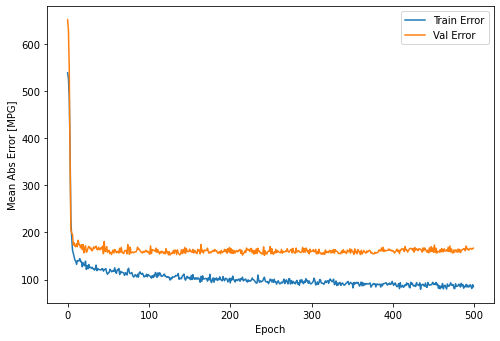

In [42]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_x, train_y, epochs=500, batch_size=32,
                    validation_split = 0.2, verbose=1)

plot_history(history)

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               4900      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
__________

In [44]:
mae_history = history.history['val_mean_absolute_error']
all_mae_histories=[]
all_mae_histories.append(mae_history)

In [46]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

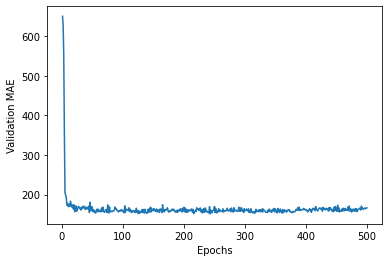

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

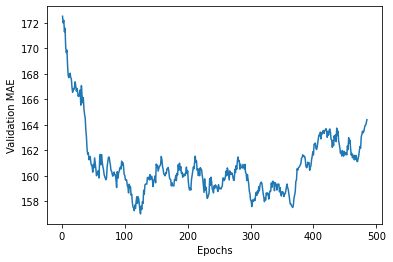

In [49]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[15:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [51]:
pred = model.predict(finaltest)

In [52]:
submission = sample_submission.copy()
submission['num'] = pred.ravel()
submission.to_csv('baseline.csv', index=False)